In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
class K_means:
    def __init__(self, k=3, threshold=0.00001, max_iteration=500):
        self.k=k
        self.threshold=threshold
        self.max_iteration=max_iteration
    
    def fit(self, data): 
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i]=data[i]
        for i in range(self.max_iteration):
            self.classes = {}
            for i in range(self.k): 
                self.classes[i] = []
            for feature in data:
                distances = [np.linalg.norm(feature-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(feature)
            self.isTrue=True
            prev_centroids = dict(self.centroids)
            for i in range(self.k):
                self.centroids[i] = np.average(self.classes[i], axis=0)
            for i in range(self.k):
                if np.sum((self.centroids[i]-prev_centroids[i])/prev_centroids[i]) > self.threshold:
                    isTrue = False
            if isTrue==True:
                break
            
    def pred(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    

Cluster: 3  Color: g



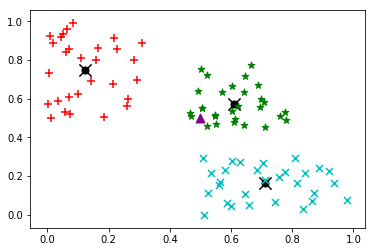

In [10]:
def main():
    df = pd.read_csv(r"./data/ipl.csv")
    df = df[['one','two']]
    #dataset = df.astype(float).values.tolist()
    X = df.values
    km = K_means(3)
    km.fit(X)
    
    colors = ['r', 'c', 'g', 'b', 'y']
    markers = ['+', 'x','*','<','>']
    
    for centroid in km.centroids:
        plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], color="black", s = 150, marker = "x")
        plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], color="black", marker="o", s=50)

    for classes in km.classes:
        color = colors[classes]
        marker = markers[classes]
        for data in km.classes[classes]:
            plt.scatter(data[0], data[1], color=color, marker=marker, s=50)
    
    pred=km.pred([0.5,0.5])
    print("Cluster: {0}  Color: {1}".format(pred+1,colors[pred]))
    print()
    plt.scatter(0.5, 0.5, color="purple", marker="^", s=80)
            
if __name__ == "__main__":
    main()
